<a href="https://colab.research.google.com/github/RohanKulkarni100/StockPricePrediction/blob/main/Trending_Chart_Pattern_Analysis(Minded_Hack)_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ChartPatterns/TestData.csv")

In [ ]:
df.columns

Index(['Unnamed: 0', 'open', 'close', 'low', 'high', 'date'], dtype='object')

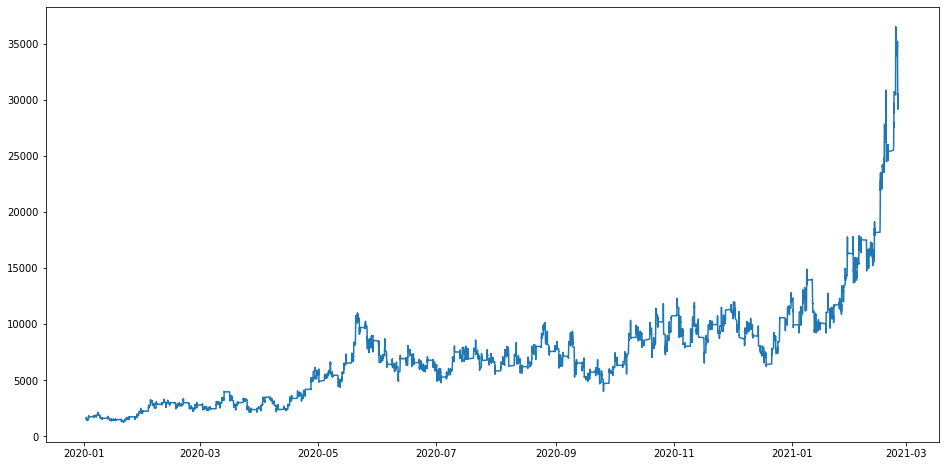

In [ ]:
df["date"]=pd.to_datetime(df.date,format="%Y-%m-%d")
df.index=df['date']
plt.figure(figsize=(16,8))
plt.plot(df["close"],label='Close Price ')

In [ ]:
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['date','close'])
for i in range(0,len(data)):
    new_dataset["date"][i]=data['date'][i]
    new_dataset["close"][i]=data["close"][i]

In [ ]:
# Splitting the date part from DataFrame
df['Date'] = [d.date() for d in df['date']]

# Splitting the time part from DataFrame
df['Time'] = [d.time() for d in df['date']]

In [ ]:
df.head()

,Unnamed: 0,open,close,low,high,date,Date,Time
date,,,,,,,,
2020-01-02 09:00:00,0,1541.130000,1547.777449,1536.242463,1552.664986,2020-01-02 09:00:00,2020-01-02,09:00:00
2020-01-02 09:05:00,1,1547.777449,1550.119675,1535.531174,1562.365950,2020-01-02 09:05:00,2020-01-02,09:05:00
2020-01-02 09:10:00,2,1550.119675,1555.196241,1541.053843,1564.262073,2020-01-02 09:10:00,2020-01-02,09:10:00
2020-01-02 09:15:00,3,1555.196241,1562.850000,1547.670809,1570.375432,2020-01-02 09:15:00,2020-01-02,09:15:00
2020-01-02 09:20:00,4,1562.850000,1565.715472,1557.312400,1571.253072,2020-01-02 09:20:00,2020-01-02,09:20:00


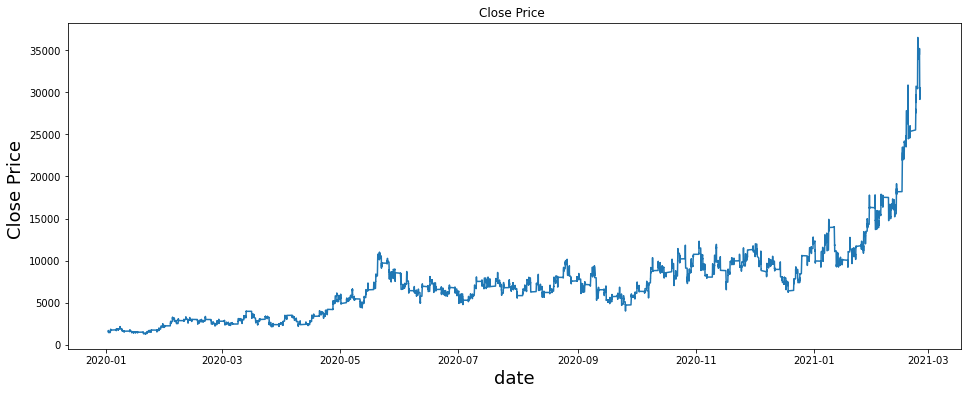

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price ')
plt.plot(df['close'])
plt.xlabel('date', fontsize=18)
plt.ylabel('Close Price ', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

20516

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00781535],
       [0.00788179],
       [0.00802579],
       ...,
       [0.80352743],
       [0.81063596],
       [0.81802873]])

In [ ]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00781535, 0.00788179, 0.00802579, 0.0082429 , 0.00832418,
       0.00860286, 0.00868614, 0.00861965, 0.00889797, 0.00895951,
       0.00908623, 0.00920294, 0.00998018, 0.01019657, 0.01065276,
       0.01102612, 0.01078823, 0.01039454, 0.00976045, 0.00927104,
       0.01015517, 0.01032127, 0.01059624, 0.01095261, 0.01173934,
       0.01110943, 0.0104316 , 0.01024591, 0.00951362, 0.00935978,
       0.01008794, 0.01031357, 0.01067045, 0.00991667, 0.00910024,
       0.00859496, 0.0086438 , 0.00827328, 0.00751784, 0.00799453,
       0.00719155, 0.00672665, 0.0072466 , 0.0063327 , 0.00643033,
       0.00637591, 0.00627559, 0.00591533, 0.00605709, 0.00580516,
       0.00550397, 0.00569539, 0.00547524, 0.00540429, 0.0057087 ,
       0.00578254, 0.00597054, 0.00606871, 0.00613849, 0.00610438])]
[0.006298145428109761]

[array([0.00781535, 0.00788179, 0.00802579, 0.0082429 , 0.00832418,
       0.00860286, 0.00868614, 0.00861965, 0.00889797, 0.00895951,
       0.00908623, 0.00920294, 0.0

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

20456/20456 [==============================] - 895s 43ms/step - loss: 5.7500e-05


In [ ]:
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

34/34 [==============================] - 4s 66ms/step


241.18324677066005

<ipython-input-14-c624982ab269>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


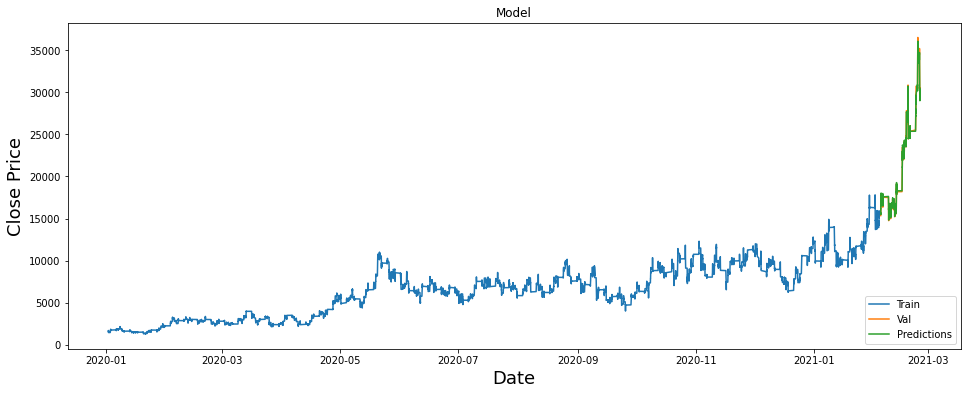

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
valid

,close,Predictions
date,,
2021-02-04 09:05:00,15350.184240,15650.140625
2021-02-04 09:10:00,15581.938227,15454.750977
2021-02-04 09:15:00,15721.829901,15706.528320
2021-02-04 09:20:00,15802.439894,15876.057617
2021-02-04 09:25:00,15752.303373,15942.031250
...,...,...
2021-02-24 14:35:00,29752.035126,29204.074219
2021-02-24 14:40:00,29539.941461,29764.279297
2021-02-24 14:45:00,29599.132840,29422.267578
